## Statistics and Data Science 2 (Python)

# Final Project 

### Group: write your group
### Team members: list down your members

## Task 1 (Classification with prepared dataset (70% of mark)):
### Background information: 
We are constantly working to improve the quality of our products and services to grow our subscriber base and minimize churn. In our work we use a personal approach to subscribers.

To reduce churn, the company uses different channels of communication with customers. Each proposal must be addressed to a specific target group. In this task, you will have to use the available data to try to identify subscribers who will churn.


### Dataset details
Anonymized data about subscribers: subscriber service language, tariff plan, information on the volume of consumption of various operator services and others.

The **churn_rate_train.csv** file contains information to build the model.

Row format: 
- 3 categorical features (C1, C2, C3)
- 23 numeric features (N1, ..., N23) 
- the target variable - TARGET


### Task
Describe the stages of building a model, build a model, evaluate it and tell the business how to apply it, that is, a business interpretation is needed.

*Note: this is how the task was originally structured, you can use it as a guidance.*

## Marking scheme
1. Data Preparation - 20%
2. Model (variety, complexity, tunning) - 30%
3. Imbalance (approaching this issue) - 20%
4. Code quality - 10%
5. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

## Hints:
1. You are given with train dataset (contains both features and target), and test dataset (contains only features). For test dataset you should predict Target, and provide your predictions as Pandas Array. I will evaluate your predictions myself.
2. To estimate key metric on test dataset, I suggest to use 5-fold Cross Validation. **Note: you don't have access to Y-test, hence you can't calculate metric on test dataset. We are simulating real life competition.**
3. You should take F1-score as your main metric.
4. To get good mark, I recommend you:
- to try at least 3 models with default settings
- to optimize at least 1 model (i.e. do hyperparameter tuning)
- to try at least 3 different methods to tackle imbalanceness
- to build consolidated table with all results
- to predict based on best obtained model

In [658]:
import pandas as pd
import warnings

In [659]:
warnings.filterwarnings('ignore')

# Data preparation

In [660]:
df_train = pd.read_csv('churn_train.csv')
df_train.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3234373639353330,313434,33,231.21,727.20,0.00,430.02,218.10,15.85,50.23,...,33,8,4,124,29,132,33,0,0,0
1,3430333334383330,343835,33,0.15,115.91,3565.02,268.58,156.62,0.00,59.07,...,134,0,47,232,87,232,134,0,0,0
2,3439383237353231,343636,33,66.29,1137.81,93.33,0.00,41.78,0.00,0.38,...,13,0,1,0,12,0,13,0,0,0
3,3339353736373733,343433,33,0.01,6.21,2333.79,258.10,41.23,67.80,20.45,...,51,72,25,118,26,200,51,0,0,0
4,3439313439343036,343835,31,33.12,1.42,59.54,58.58,12.72,3.35,3.18,...,14,5,7,44,7,49,14,0,0,0


### Feature selection

In [661]:
group_counts = df_train['C1'].value_counts()
print(group_counts)

C1
3234373639353330    1
3437333635323930    1
3231333634373439    1
3335363630303934    1
3435313438333239    1
                   ..
3333323235303431    1
3139333337313033    1
3333373830303338    1
3134343232323234    1
3333363531323438    1
Name: count, Length: 411207, dtype: int64


In [662]:
df_train.drop(columns=['C1'], inplace=True)

In [663]:
group_counts = df_train['C2'].value_counts()
print(group_counts)

C2
343637    47854
343439    45986
343433    35379
343835    34155
343038    32951
          ...  
323530        1
3437          1
313433        1
353031        1
3330          1
Name: count, Length: 63, dtype: int64


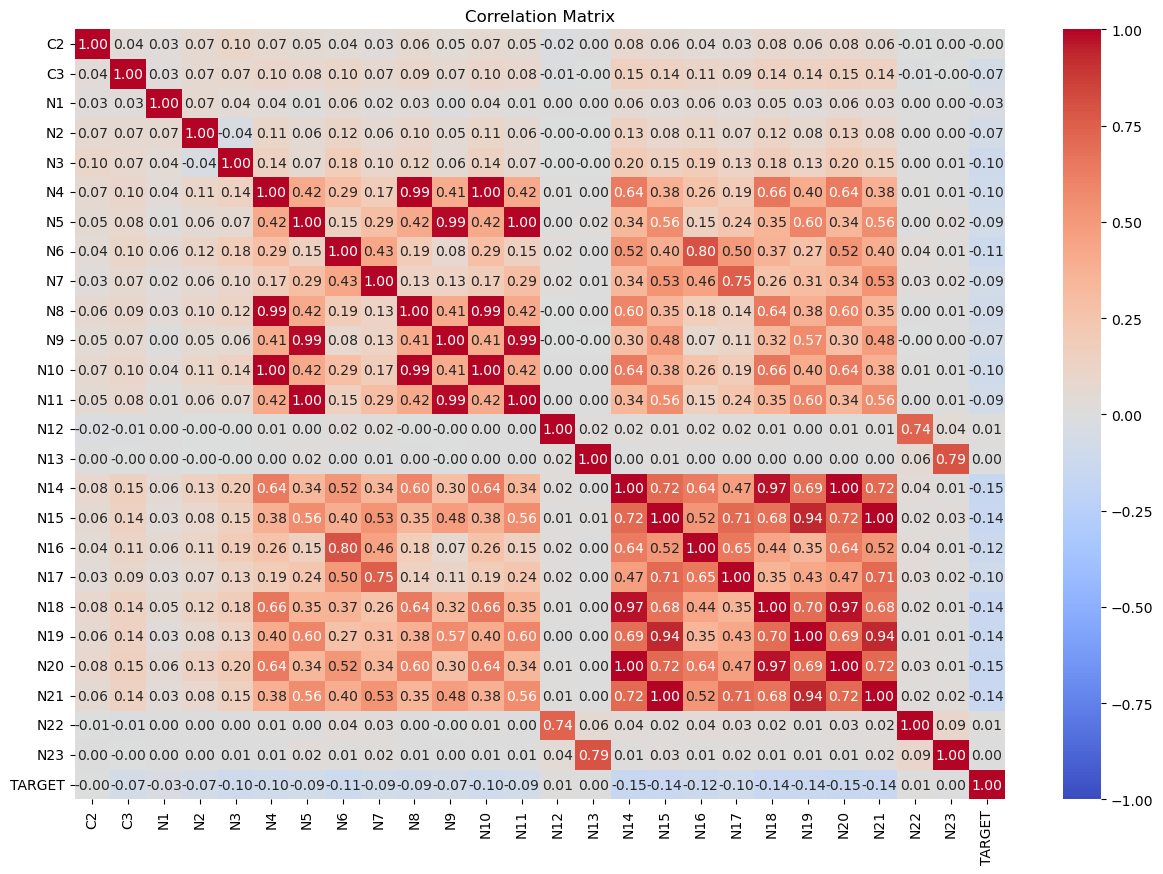

In [664]:
corr_matrix = df_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [665]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_train.corr()
target_corr = corr_matrix['TARGET']
least_important_features = target_corr.abs().nsmallest(10).index.tolist()
least_important_features = [feat for feat in least_important_features if feat != 'TARGET']
print("Top 10 least important features for targeting:")
print(least_important_features)

Top 10 least important features for targeting:
['N13', 'C2', 'N23', 'N12', 'N22', 'N1', 'C3', 'N2', 'N9', 'N7']


Lets drop unnecessary

In [666]:
df_train.drop(columns=['C2'], inplace=True)
df_train.drop(columns=['N23'], inplace=True)
df_train.drop(columns=['N22'], inplace=True)
df_train.drop(columns=['N13'], inplace=True)
df_train.drop(columns=['N12'], inplace=True)

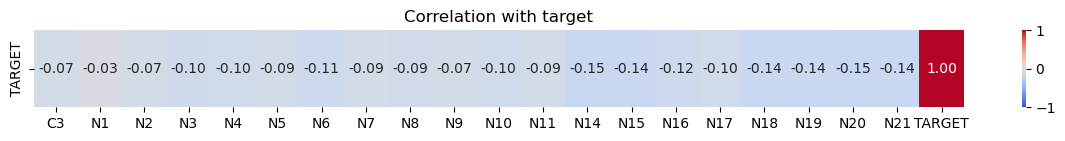

In [667]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_train.corr()
target_corr = corr_matrix[['TARGET']].T
plt.figure(figsize=(15, 1))
sns.heatmap(target_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation with {target}')
plt.show()

In [668]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411207 entries, 0 to 411206
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C3      411207 non-null  int64  
 1   N1      411207 non-null  float64
 2   N2      411207 non-null  float64
 3   N3      411207 non-null  float64
 4   N4      411207 non-null  float64
 5   N5      411207 non-null  float64
 6   N6      411207 non-null  float64
 7   N7      411207 non-null  float64
 8   N8      411207 non-null  float64
 9   N9      411207 non-null  float64
 10  N10     411207 non-null  float64
 11  N11     411207 non-null  float64
 12  N14     411207 non-null  int64  
 13  N15     411207 non-null  int64  
 14  N16     411207 non-null  int64  
 15  N17     411207 non-null  int64  
 16  N18     411207 non-null  int64  
 17  N19     411207 non-null  int64  
 18  N20     411207 non-null  int64  
 19  N21     411207 non-null  int64  
 20  TARGET  411207 non-null  int64  
dtypes: float64

### Null valuess and dublicates 

In [669]:
duplicates = df_train.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates == 0:
    print("There are no duplicates in the DataFrame")
else:
    print(f"В DataFrame detected {num_duplicates} duplicate(s)")

if num_duplicates > 0:
    print("\nList of duplicates:")
    print(df_train[duplicates])

В DataFrame detected 22775 duplicate(s)

List of duplicates:
        C3   N1   N2    N3   N4   N5   N6   N7   N8   N9  ...  N11  N14  N15  \
199     31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
226     31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
366     31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
368     31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
372     31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
...     ..  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
411157  33  0.0  0.0  0.07  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
411176  31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
411178  31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
411183  31  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0    0   
411201  33  0.0  0.0  0.00  0.0  0.8  0.0  0.8  0.0  0.0  .

In [670]:
df_train = df_train.drop_duplicates()

In [671]:
duplicates = df_train.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates == 0:
    print("There are no duplicates in the DataFrame")
else:
    print(f"В DataFrame detected {num_duplicates} duplicate(s)")

if num_duplicates > 0:
    print("\nList of duplicates:")
    print(df_train[duplicates])

There are no duplicates in the DataFrame


In [672]:
null_values = df_train.isnull().sum()
print("Number of null values in each column:")
print(null_values[null_values > 0])  

Number of null values in each column:
Series([], dtype: int64)


In [673]:
df_train.describe(include='all')

,C3,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N11,N14,N15,N16,N17,N18,N19,N20,N21,TARGET
count,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,...,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000,388432.000000
mean,31.651481,46.988796,993.025443,3046.335883,114.980563,66.415789,13.607951,10.018425,100.190024,56.223082,...,66.383352,52.622418,30.763938,11.052514,8.194999,40.993183,22.475157,52.572273,30.743695,0.030296
std,0.937251,234.808672,2336.469829,5031.846113,202.969668,101.463343,19.784532,17.115106,197.170619,98.021010,...,101.439048,59.271059,31.416142,15.055986,12.175732,50.922125,24.361264,59.250184,31.408899,0.171401
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,7.170000,12.650000,0.000000,0.520000,2.430000,7.530000,...,12.630000,8.000000,9.000000,0.000000,1.000000,4.000000,6.000000,8.000000,9.000000,0.000000
50%,31.000000,0.000000,112.610000,385.200000,51.750000,36.500000,6.020000,3.850000,34.730000,26.350000,...,36.480000,36.000000,22.000000,6.000000,4.000000,24.000000,15.000000,36.000000,22.000000,0.000000
75%,33.000000,1.000000,873.062500,4566.045000,139.880000,81.500000,19.450000,12.370000,116.170000,65.950000,...,81.470000,77.000000,42.000000,16.000000,11.000000,59.000000,31.000000,76.000000,42.000000,0.000000
max,33.000000,27971.110000,96905.370000,201234.910000,9197.630000,4720.780000,441.880000,999.780000,9194.270000,4720.780000,...,4720.780000,1346.000000,1258.000000,350.000000,499.000000,1109.000000,1024.000000,1346.000000,1258.000000,1.000000


### Solve outliers 

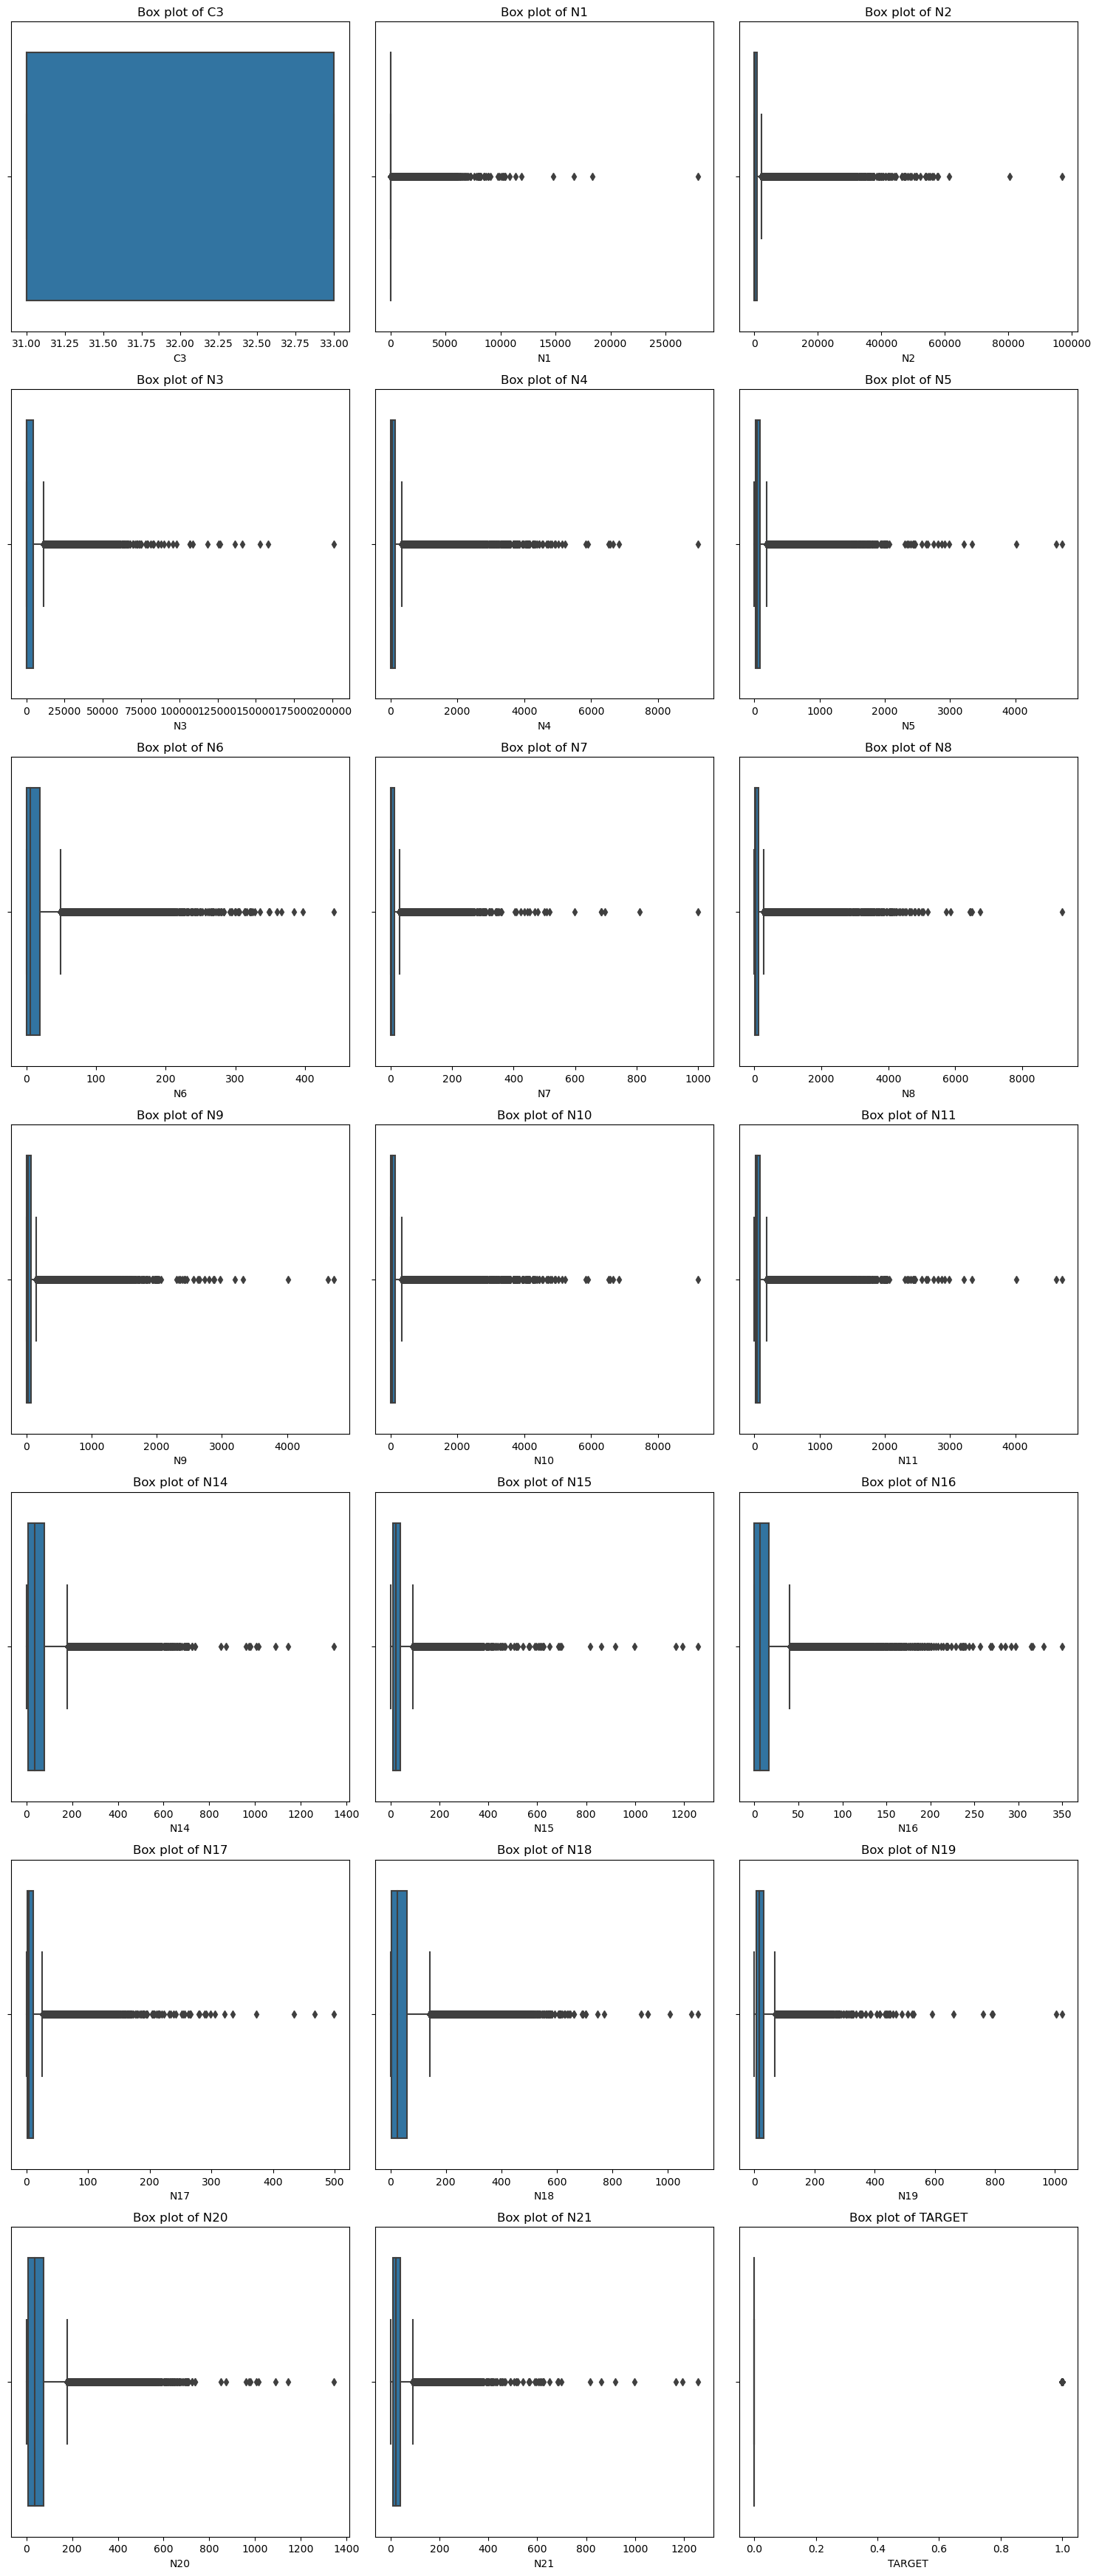

In [674]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_train.select_dtypes(include='number').columns
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [675]:
df_train.shape

(388432, 21)

The number of instances of each class:
TARGET
0    376664
1     11768
Name: count, dtype: int64


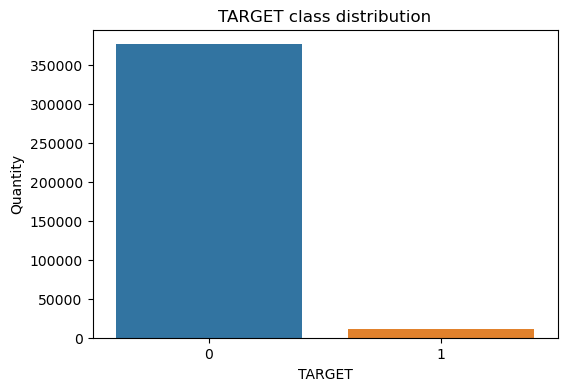

In [676]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = df_train['TARGET'].value_counts()
print("The number of instances of each class:")
print(target_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df_train)
plt.title('TARGET class distribution')
plt.xlabel('TARGET')
plt.ylabel('Quantity')
plt.show()

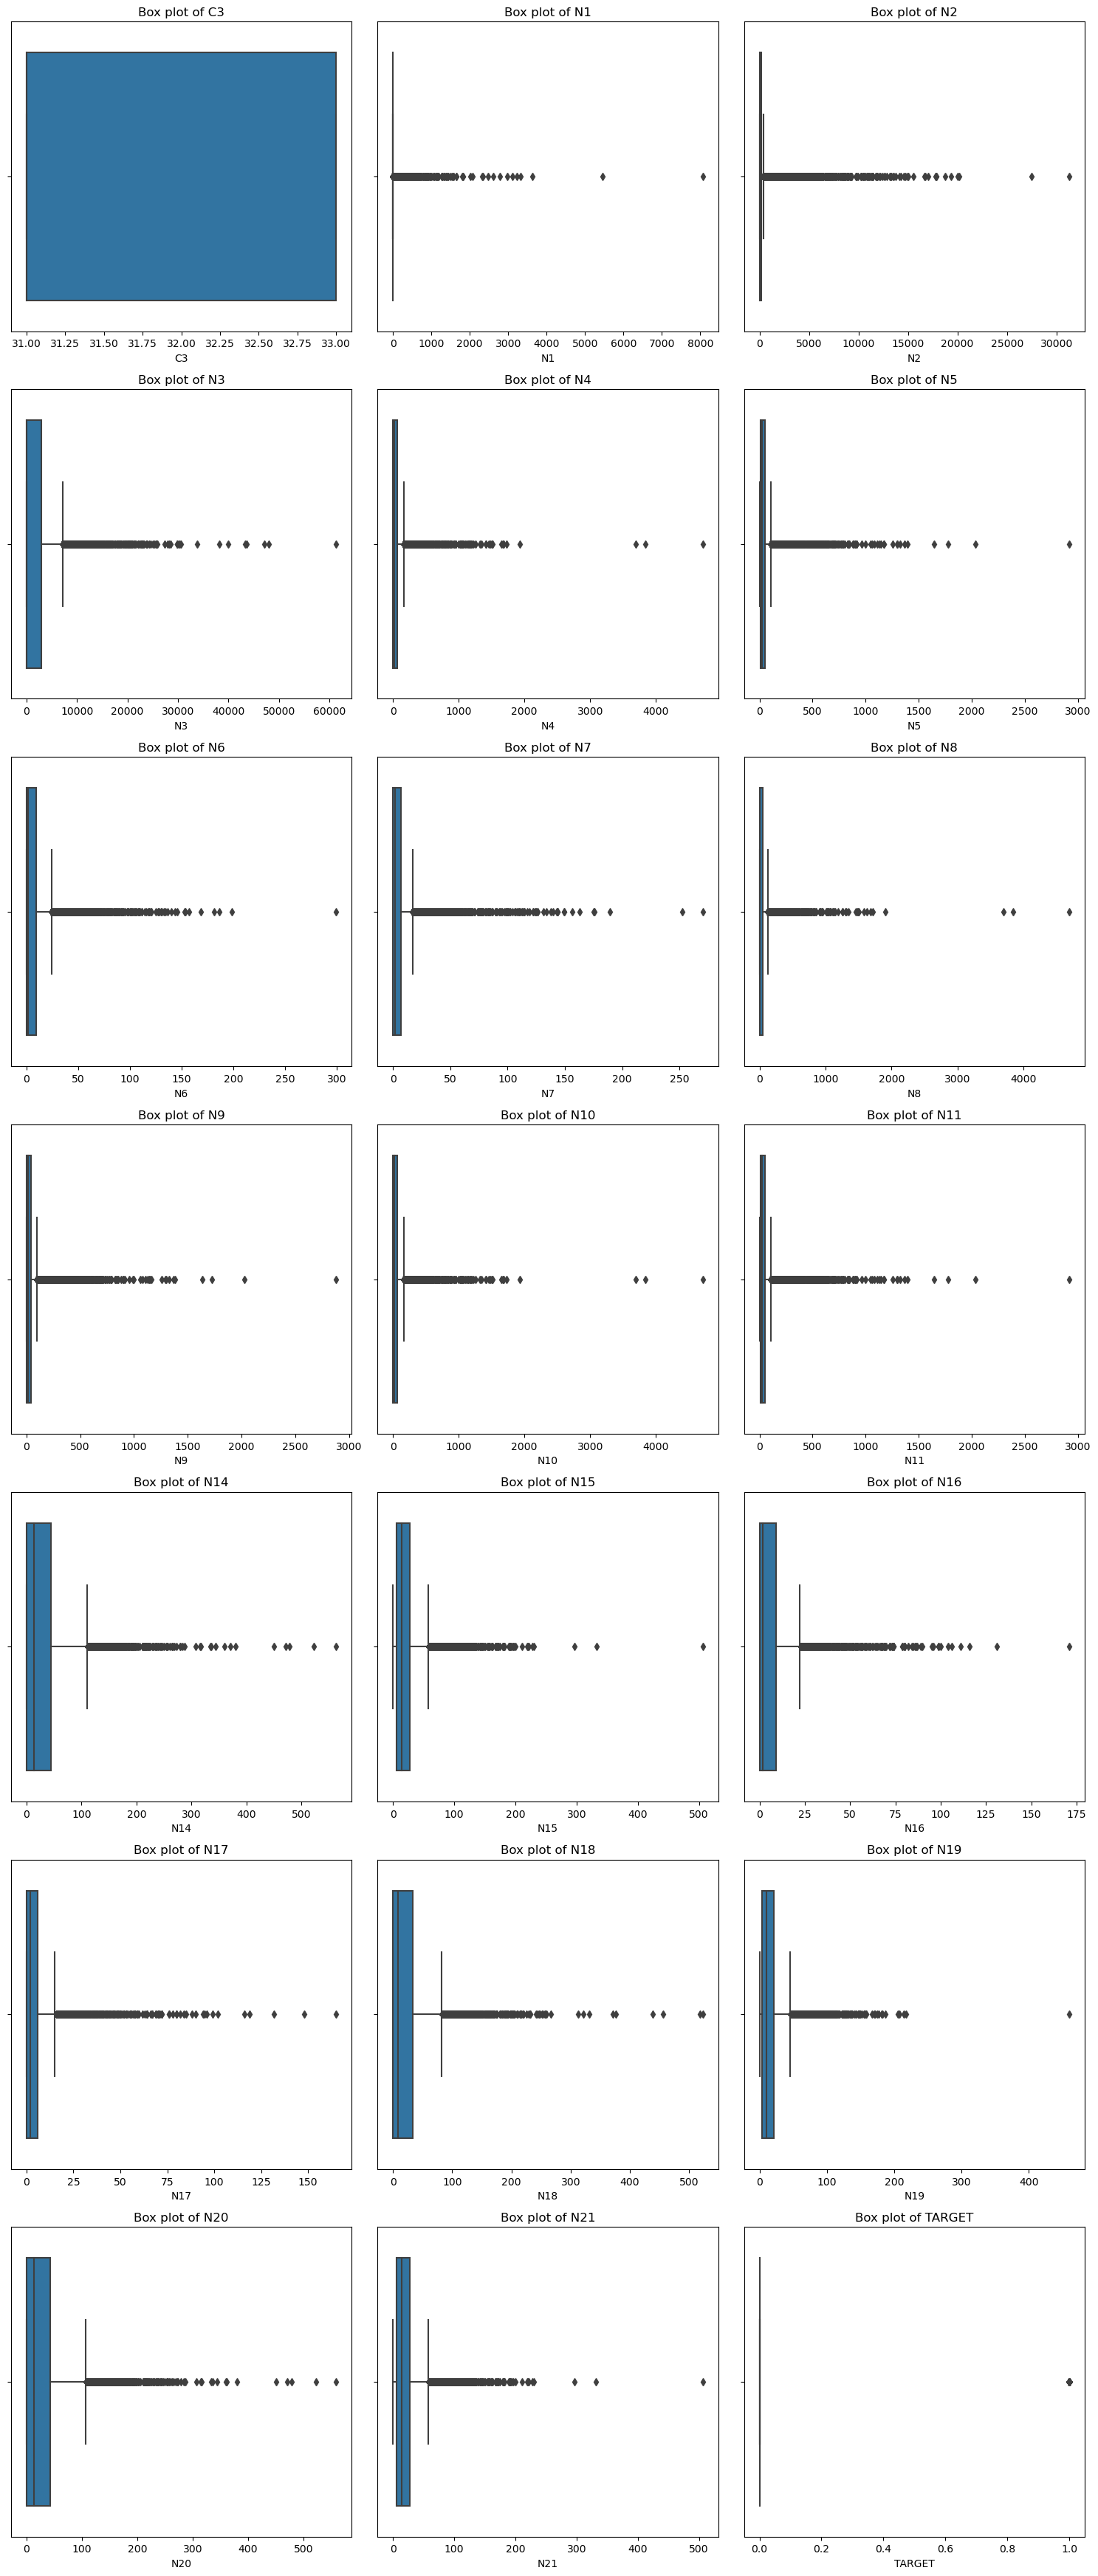

In [677]:
Q1 = df_train[numerical_cols][df_train['TARGET'] == 0].quantile(0.25)
Q3 = df_train[numerical_cols][df_train['TARGET'] == 0].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = ((df_train[numerical_cols] < (Q1 - threshold * IQR)) | (df_train[numerical_cols] > (Q3 + threshold * IQR))).any(axis=1) & (df_train['TARGET'] == 0)
df_train = df_train[~outliers]

numerical_cols = df_train.select_dtypes(include='number').columns
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [678]:
df_train.shape

(194424, 21)

The number of instances of each class:
TARGET
0    182656
1     11768
Name: count, dtype: int64


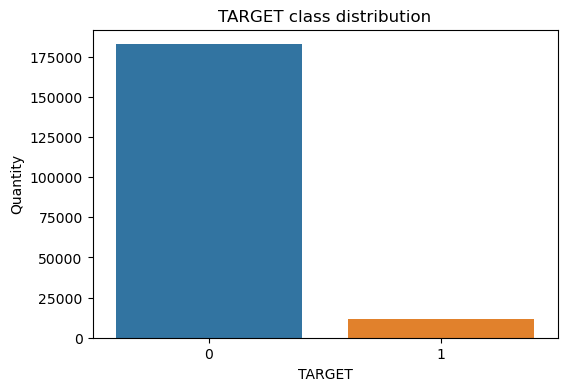

In [679]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = df_train['TARGET'].value_counts()
print("The number of instances of each class:")
print(target_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df_train)
plt.title('TARGET class distribution')
plt.xlabel('TARGET')
plt.ylabel('Quantity')
plt.show()

### Data preprocessing 

Onhot encoder - One-hot encoding converts categorical data into a binary format. Each category becomes a separate column with 1 indicating presence and 0 indicating absence.

Standard scaler - Standard Scaler is a technique used to normalize the features of your dataset. It transforms the data to have a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms.

In [680]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['C3']
numerical_cols = ['N1', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot_encoding', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train = df_train.drop('TARGET', axis=1)
y_train = df_train['TARGET']
X_train = preprocessor.fit_transform(X_train)
print(X_train.shape)

(194424, 21)


# Models

First, we split the transformed data into training and test data and then estimate three different models with default parameters on the original dataset

In [681]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Model

Logistic regression is a statistical method used for binary classification that predicts the probability of a binary outcome. It's a linear model for classification rather than regression.

F1 Score: 0.18
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     36548
           1       1.00      0.10      0.18      2337

    accuracy                           0.95     38885
   macro avg       0.97      0.55      0.57     38885
weighted avg       0.95      0.95      0.92     38885



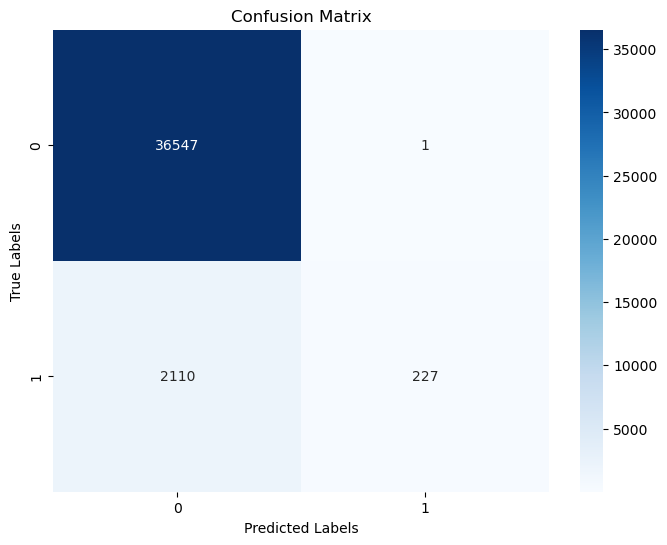

In [682]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression(max_iter=10000, random_state=42)  # Reduce the number of iterations
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [683]:
f1_score_LR_default=f1_score(y_test, y_pred)
print(f1_score_LR_default)

0.1769980506822612


### Decision Tree Model

A decision tree for classification is a supervised learning algorithm that recursively splits the data into subsets based on the value of input features, ultimately assigning a class label to each leaf node. 

F1 Score: 0.27
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     36548
           1       0.26      0.28      0.27      2337

    accuracy                           0.91     38885
   macro avg       0.61      0.61      0.61     38885
weighted avg       0.91      0.91      0.91     38885



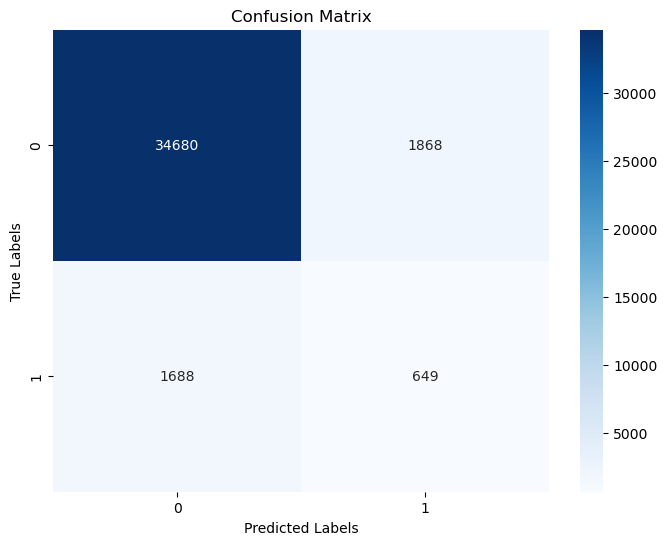

In [684]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [685]:
f1_score_DT_default=f1_score(y_test, y_pred)
print(f1_score_DT_default)

0.2674083230325505


### Random forest model

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

F1 Score: 0.33

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     36548
           1       0.47      0.26      0.33      2337

    accuracy                           0.94     38885
   macro avg       0.71      0.62      0.65     38885
weighted avg       0.93      0.94      0.93     38885



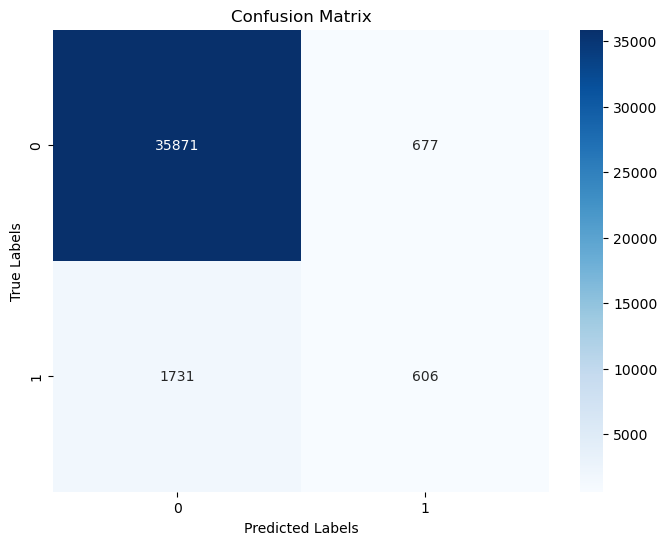

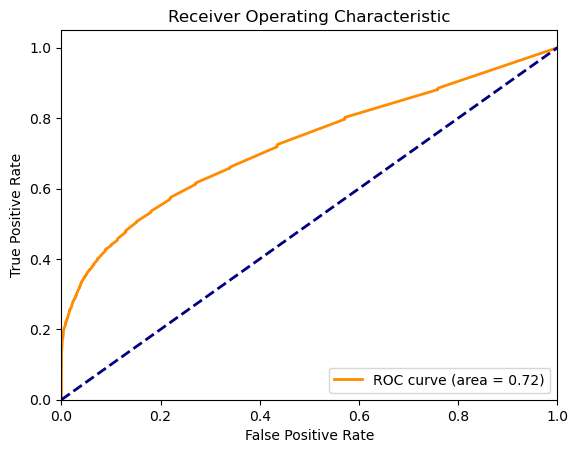

In [686]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [687]:
f1_score_RF_default=f1_score(y_test, y_pred)
print(f1_score_RF_default)

0.33480662983425413


# Solving data imbalance problem

Next, we will analyze 4 approaches to correct the unbalanced data, evaluate them on the improvements of the regression model result and apply the best one on all models

### 1) Adjusting classification threshold

Adjusting the classification threshold modifies the decision boundary of a classification model, allowing for a trade-off between sensitivity and specificity by changing the probability threshold for assigning class labels to samples.

In [688]:
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]

threshold = 0.3 
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("Adjusted Threshold Model Performance:")
print("F1 Score:", f1_score(y_test, y_pred_adjusted))


Adjusted Threshold Model Performance:
F1 Score: 0.19135802469135801


In [689]:
f1_score_LR_WithAdjustedThreshol=f1_score(y_test, y_pred_adjusted)
print(f1_score_LR_WithAdjustedThreshol)

0.19135802469135801


### 2) SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in machine learning datasets by generating synthetic samples for the minority class based on the feature space similarity of existing minority class instances, thus balancing the class distribution and improving the performance of classification models.

In [690]:
#conda install -c conda-forge imbalanced-learn

In [691]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("SMOTE Resampled Data Model Performance:")
print("F1 Score:", f1_score(y_test, y_pred))


SMOTE Resampled Data Model Performance:
F1 Score: 0.17604462801051332


In [692]:
f1_score_LR_WithSMOTE=f1_score(y_test, y_pred)
print(f1_score_LR_WithSMOTE)

0.17604462801051332


### 3) Manual Downsampling

Manual Downsampling randomly removes samples from the majority class to balance the class distribution, thereby preventing the model from being biased towards the majority class and improving its ability to generalize to the minority class.

In [693]:
from sklearn.utils import resample

df_majority = df_train[df_train.TARGET == 0]
df_minority = df_train[df_train.TARGET == 1]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,   
                                   n_samples=len(df_minority),  
                                   random_state=123) 

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled.drop('TARGET', axis=1)
y = df_downsampled['TARGET']
X = preprocessor.fit_transform(X)

print(X_train.shape)
print(df_downsampled.TARGET.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Undersampled Data Model Performance:")
print("F1 Score:", f1_score(y_test, y_pred))

(155539, 21)
TARGET
0    11768
1    11768
Name: count, dtype: int64
Undersampled Data Model Performance:
F1 Score: 0.6625473390472394


In [694]:
f1_score_LR_WithDownsampling=f1_score(y_test, y_pred)
print(f1_score_LR_WithDownsampling)

0.6625473390472394


### 4) Manual Oversampling

Manual Oversampling artificially increases the number of samples in the minority class. This is typically done by duplicating existing samples or generating synthetic samples based on the existing minority class instances, thereby balancing the class distribution and improving the model's ability to learn from the minority class.

In [695]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),   
                                 random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X = df_upsampled.drop('TARGET', axis=1)
y = df_upsampled['TARGET']
X = preprocessor.transform(X)

print(X.shape)
print(df_upsampled.TARGET.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Oversampled Data Model Performance:")
print("F1 Score:", f1_score(y_test, y_pred))


(365312, 21)
TARGET
0    182656
1    182656
Name: count, dtype: int64
Oversampled Data Model Performance:
F1 Score: 0.6722623766223672


In [696]:
f1_score_LR_WithOversampling=f1_score(y_test, y_pred)
print(f1_score_LR_WithOversampling)

0.6722623766223672


Best results are shown after Oversampling, so in future we will use upsampled dataset

## Re-train models

After corrections in imbalase part, we need to re-train our models

### Logistic Regression with oversampling

Mean cross-validation f1 score: 0.67
Logistic Regression F1 Score Validation: 0.67
Logistic Regression Classification Report Validation:
               precision    recall  f1-score   support

           0       0.68      0.60      0.63     36615
           1       0.64      0.71      0.67     36448

    accuracy                           0.65     73063
   macro avg       0.66      0.65      0.65     73063
weighted avg       0.66      0.65      0.65     73063



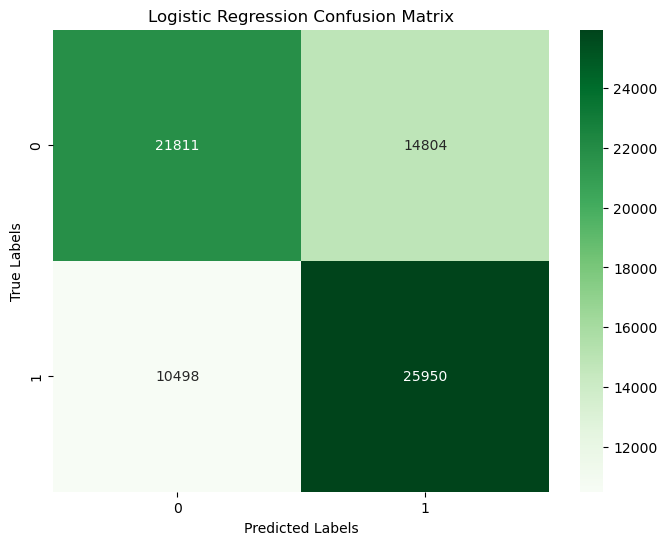

In [697]:
from sklearn.model_selection import cross_val_score

model_lr = LogisticRegression(max_iter=1000, random_state=42)
f1_scores = cross_val_score(model_lr, X, y, cv=5, scoring='f1')
print(f'Mean cross-validation f1 score: {f1_scores.mean():.2f}')

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print(f'Logistic Regression F1 Score Validation: {f1_score(y_test, y_pred_lr):.2f}')
print("Logistic Regression Classification Report Validation:\n", classification_report(y_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()

In [698]:
f1_score_LR_WithOversampling=f1_scores.mean()
print(f1_score_LR_WithOversampling)

0.6727575530186247


### RandomForest with oversampling

Mean cross-validation f1 score: 0.9812
F1 Score Validation: 0.9834

Classification Report Validation:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     36615
           1       0.97      1.00      0.98     36448

    accuracy                           0.98     73063
   macro avg       0.98      0.98      0.98     73063
weighted avg       0.98      0.98      0.98     73063



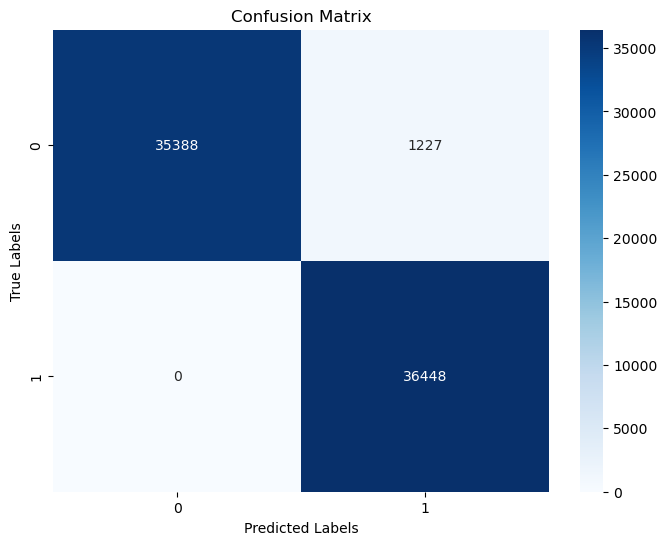

In [699]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = RandomForestClassifier(n_estimators=10, random_state=42)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='f1')
print(f'Mean cross-validation f1 score: {f1_scores.mean():.4f}')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1_test = f1_score(y_test, y_pred)
print(f'F1 Score Validation: {f1_test:.4f}')
print("\nClassification Report Validation:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()


In [700]:
f1_score_RF_WithOversampling=f1_scores.mean()
print(f1_score_RF_WithOversampling)

0.9812138416998829


### DecisionTree with oversampling

Decision Tree F1 Scores: [0.96215487 0.96366483 0.96303249 0.96255082 0.96368071]
Decision Tree Mean F1 Score: 0.9630 (±0.0006)
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97     36615
           1       0.94      1.00      0.97     36448

    accuracy                           0.97     73063
   macro avg       0.97      0.97      0.97     73063
weighted avg       0.97      0.97      0.97     73063



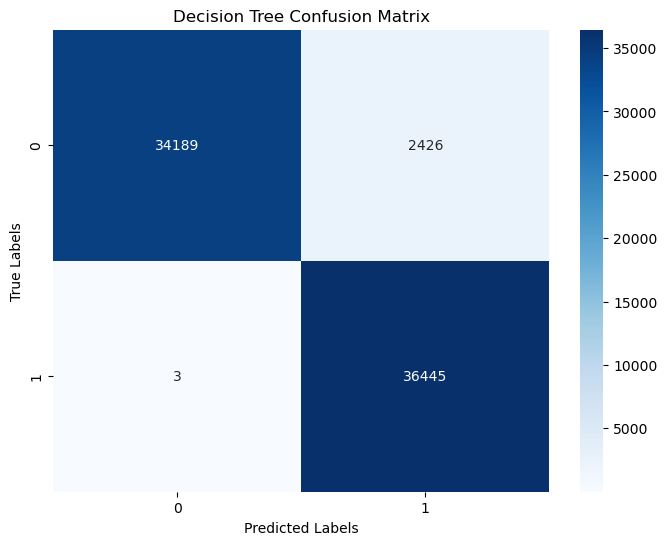

In [701]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_dt = DecisionTreeClassifier(random_state=42)
f1_scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='f1')

print(f'Decision Tree F1 Scores: {f1_scores}')
print(f'Decision Tree Mean F1 Score: {f1_scores.mean():.4f} (±{f1_scores.std():.4f})')

model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Decision Tree Confusion Matrix')
plt.show()

In [702]:
f1_score_DT_WithOversampling=f1_scores.mean()
print(f1_score_DT_WithOversampling)

0.9630167429023697


As you can see the results are changed before and after corrections in imbalanse

## Model Tunning

For further improvement, we chose the DecisionTree model because it shows results close to RandomForest but requires much less computing power

### Initial initialization of the DecisionTree 

In [703]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = df_upsampled.drop('TARGET', axis=1)
y = df_upsampled['TARGET']
X = preprocessor.transform(X) 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(X.shape)

model_dt = DecisionTreeClassifier(random_state=42)

(365312, 21)


### Recursive Feature Elimination 

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to automatically select a subset of features that are most relevant to the target variable. It works by recursively removing features and building models on the remaining features until the optimal subset of features is identified. RFE assigns weights to features and ranks them based on their importance, allowing for the selection of the most informative features while discarding less relevant ones, thereby improving model performance and reducing overfitting.

In [705]:
rfe = RFE(estimator=model_dt, n_features_to_select=15, step=5)
X_rfe = rfe.fit_transform(X, y)

cv_scores_rfe = cross_val_score(model_dt, X_rfe, y, cv=cv, scoring='f1', n_jobs=-1)
print(f'Initial RFE Cross-Validation F1 Scores: {cv_scores_rfe}')
print(f'Initial RFE Mean Cross-Validation F1 Score: {cv_scores_rfe.mean():.4f}')


Initial RFE Cross-Validation F1 Scores: [0.96752662 0.96688987 0.96769237 0.96846542 0.96702977]
Initial RFE Mean Cross-Validation F1 Score: 0.9675


In [706]:
f1_score_DT_WithOversampling_RFE=f1_score(y_test, y_pred_dt)
print(f1_score_DT_WithOversampling_RFE)

0.967750501201556


###  Bagging Application 

Bagging stands for Bootstrap Aggregating, and it's an ensemble meta-algorithm that improves the stability and accuracy of models.

It trains multiple base models on bootstrap samples of the dataset and combines their predictions through aggregation, such as averaging or voting.

In [708]:
bagging_model_rfe = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42, oob_score=True, n_jobs=-1)
bagging_model_rfe.fit(X_rfe, y)

oob_predictions_rfe = np.argmax(bagging_model_rfe.oob_decision_function_, axis=1)
print(f'Bagging with RFE OOB F1 Score: {f1_score(y, oob_predictions_rfe):.6f}')

Bagging with RFE OOB F1 Score: 0.983870


In [709]:
f1_score_DT_WithOversampling_Bagging=f1_score(y, oob_predictions_rfe)
print(f1_score_DT_WithOversampling_Bagging)

0.983870229274901


### Hyperparameters tunning

RandomizedSearchCV: This method performs hyperparameter tuning through random search, exploring a specified number of parameter settings (n_iter) defined in the param_grid dictionary. It conducts cross-validation (cv) and evaluates the F1 score for each combination of hyperparameters, returning the best estimator with the highest F1 score.

OOB (Out-of-Bag) evaluation is a technique used in ensemble learning to estimate a model's performance without the need for a separate validation set. It leverages samples not included in the bootstrap training samples to compute an unbiased estimate of the model's accuracy, making it a convenient and efficient method for model evaluation.

In [710]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'base_estimator__max_depth': [20, None],
    'base_estimator__min_samples_split': [2, 3],
    'base_estimator__min_samples_leaf': [1, 3],
    'n_estimators': [50, 100]
}

random_search_rfe = RandomizedSearchCV(
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42, oob_score=True, n_jobs=-1),
    param_grid, cv=cv, scoring='f1', n_jobs=-1, n_iter=10, random_state=42)

random_search_rfe.fit(X_rfe, y)

best_bagging_model_rfe = random_search_rfe.best_estimator_
oob_predictions_best_rfe = best_bagging_model_rfe.oob_decision_function_
oob_predictions_best_rfe = np.argmax(oob_predictions_best_rfe, axis=1)
print(f'Best Bagging with RFE OOB F1 Score: {f1_score(y, oob_predictions_best_rfe):.6f}')

Best Bagging with RFE OOB F1 Score: 0.984297


In [711]:
print("Best parameters:")
print(random_search_rfe.best_params_)

Best parameters:
{'n_estimators': 100, 'base_estimator__min_samples_split': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__max_depth': None}


In [712]:
f1_score_DT_WithOversampling_Bagging_Best=f1_score(y, oob_predictions_best_rfe)
print(f1_score_DT_WithOversampling_Bagging_Best)

0.9842970307700598


Best Bagging with RFE F1 Score on OOB Data: 0.9842970
Best Bagging with RFE Classification Report on OOB Data:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    182656
           1       0.97      1.00      0.98    182656

    accuracy                           0.98    365312
   macro avg       0.98      0.98      0.98    365312
weighted avg       0.98      0.98      0.98    365312



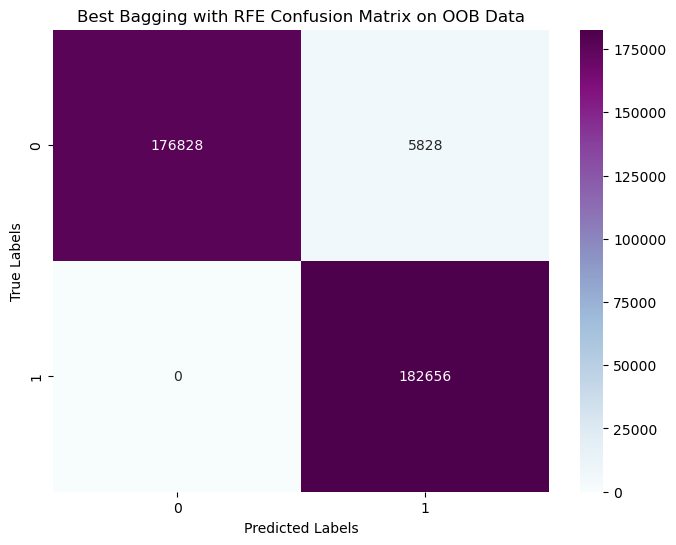

In [713]:
print(f'Best Bagging with RFE F1 Score on OOB Data: {f1_score(y, oob_predictions_best_rfe):.7f}')
print("Best Bagging with RFE Classification Report on OOB Data:\n", classification_report(y, oob_predictions_best_rfe))

conf_matrix_best_bagging_rfe = confusion_matrix(y, oob_predictions_best_rfe)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_best_bagging_rfe, annot=True, fmt='d', cmap='BuPu', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Best Bagging with RFE Confusion Matrix on OOB Data')
plt.show()

## Conclusion

In [714]:
import pandas as pd

f1_scores = {
    'RF_default': round(f1_score_RF_default, 3),
    'LR_default': round(f1_score_LR_default, 3),
    'DT_default': round(f1_score_DT_default, 3),
    'LR_WithAdjustedThreshol': round(f1_score_LR_WithAdjustedThreshol, 3),
    'LR_WithSMOTE': round(f1_score_LR_WithSMOTE, 3),
    'LR_WithDownsampling': round(f1_score_LR_WithDownsampling, 3),
    'LR_WithOversampling': round(f1_score_LR_WithOversampling, 3),
    'RF_WithOversampling': round(f1_score_RF_WithOversampling, 3),
    'DT_WithOversampling': round(f1_score_DT_WithOversampling, 3),
    'DT_WithOversampling_RFE': round(f1_score_DT_WithOversampling_RFE, 3),
    'DT_WithOversampling_Bagging': round(f1_score_DT_WithOversampling_Bagging, 3),
    'DT_WithOversampling_Bagging_Best': round(f1_score_DT_WithOversampling_Bagging_Best, 3)
}

data = {
    'Model/Method': list(f1_scores.keys()),
    'F1-score': list(f1_scores.values())
}

df = pd.DataFrame(data)
print(df)


                        Model/Method  F1-score
0                         RF_default     0.335
1                         LR_default     0.177
2                         DT_default     0.267
3            LR_WithAdjustedThreshol     0.191
4                       LR_WithSMOTE     0.176
5                LR_WithDownsampling     0.663
6                LR_WithOversampling     0.673
7                RF_WithOversampling     0.981
8                DT_WithOversampling     0.963
9            DT_WithOversampling_RFE     0.968
10       DT_WithOversampling_Bagging     0.984
11  DT_WithOversampling_Bagging_Best     0.984


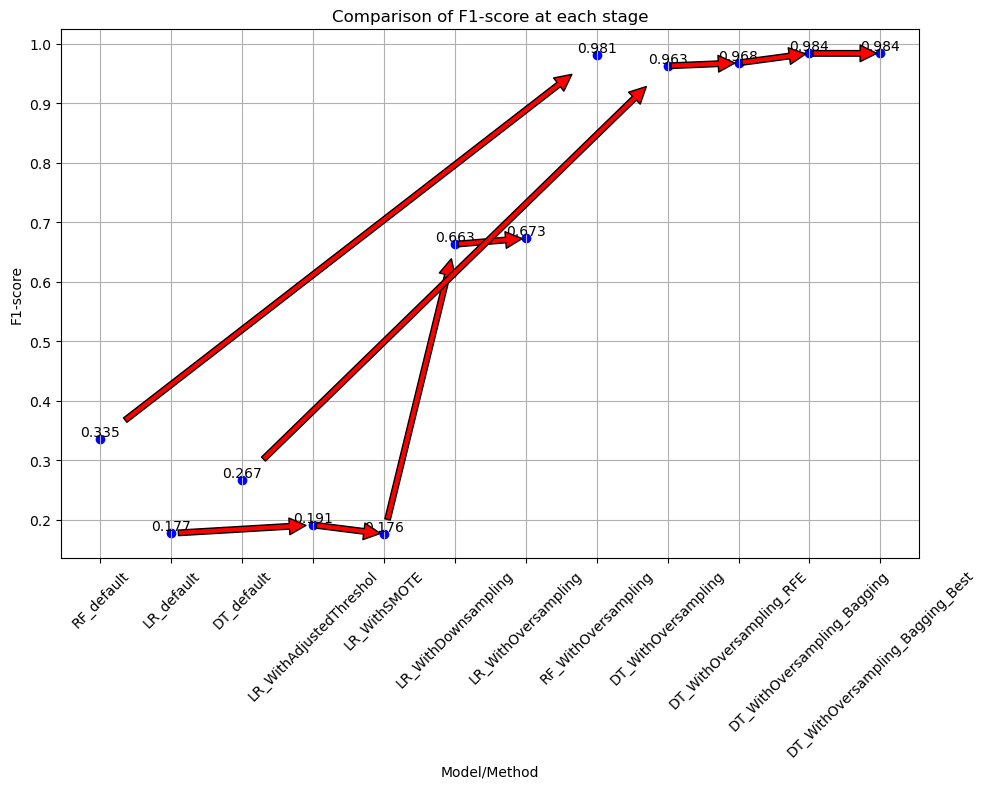

In [715]:
import matplotlib.pyplot as plt

arrows = [
    ('RF_default', 'RF_WithOversampling'),
    ('LR_default', 'LR_WithAdjustedThreshol'),
    ('LR_WithAdjustedThreshol', 'LR_WithSMOTE'),
    ('LR_WithSMOTE', 'LR_WithDownsampling'),
    ('LR_WithDownsampling', 'LR_WithOversampling'),
    ('DT_default', 'DT_WithOversampling'),
    ('DT_WithOversampling', 'DT_WithOversampling_RFE'),
    ('DT_WithOversampling_RFE', 'DT_WithOversampling_Bagging'),
    ('DT_WithOversampling_Bagging', 'DT_WithOversampling_Bagging_Best')
]

plt.figure(figsize=(10, 8))

for model, f1_score in f1_scores.items():
    plt.scatter(model, f1_score, color='blue', label=model)
    plt.text(model, f1_score, f'{f1_score}', ha='center', va='bottom')

for arrow in arrows:
    plt.annotate('', xy=(arrow[1], f1_scores[arrow[1]]), xytext=(arrow[0], f1_scores[arrow[0]]),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Comparison of F1-score at each stage')
plt.xlabel('Model/Method')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()


This churn prediction model classifies subscribers based on their likelihood to churn. We can use these classifications to personalize and optimize our offers, targeting at-risk subscribers with specific retention strategies. This helps us improve customer satisfaction and reduce churn.

## Applying the best model on test data 

In [716]:
df_test = pd.read_csv('X_churn_test.csv')
df_test.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
0,3531383839343233,343439,31,0.00,1210.58,9679.97,657.10,331.60,0.00,6.03,...,94,31,0,5,94,26,94,31,0,0
1,3235303635303039,3434,31,0.00,0.00,0.00,0.08,1.60,0.00,0.00,...,3,2,0,0,2,2,3,2,0,0
2,3433373930343038,343433,31,0.18,324.36,3611.99,129.02,677.98,5.12,0.00,...,7,21,3,0,4,21,7,21,0,0
3,3532373635343736,343637,31,0.00,0.00,0.00,69.57,72.17,0.00,5.88,...,20,21,0,3,20,18,20,21,0,0
4,3331323035323031,313435,33,189.21,4340.27,0.00,305.88,420.83,6.73,8.27,...,96,79,7,11,89,68,96,79,0,0


In [717]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102802 entries, 0 to 102801
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      102802 non-null  int64  
 1   C2      102802 non-null  int64  
 2   C3      102802 non-null  int64  
 3   N1      102802 non-null  float64
 4   N2      102802 non-null  float64
 5   N3      102802 non-null  float64
 6   N4      102802 non-null  float64
 7   N5      102802 non-null  float64
 8   N6      102802 non-null  float64
 9   N7      102802 non-null  float64
 10  N8      102802 non-null  float64
 11  N9      102802 non-null  float64
 12  N10     102802 non-null  float64
 13  N11     102802 non-null  float64
 14  N12     102802 non-null  float64
 15  N13     102802 non-null  float64
 16  N14     102802 non-null  int64  
 17  N15     102802 non-null  int64  
 18  N16     102802 non-null  int64  
 19  N17     102802 non-null  int64  
 20  N18     102802 non-null  int64  
 21  N19     10

### Prediction

In [718]:
X_test_test_test = preprocessor.transform(df_test)
X_test_test_rfe = rfe.transform(X_test_test_test)

test_predictions = best_bagging_model_rfe.predict(X_test_test_rfe)

np.set_printoptions(threshold=np.inf)
print("Test Predictions:")
print(test_predictions)

Test Predictions:
[1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1
 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 1 1 0 

## Task 2 (Clustering with any dataset (30% of mark))
1. Select any dataset that will suit for clustering
2. Observe your data
3. Apply some data preparation
4. Apply clustering model
5. Visualise your obtained clusters

## Marking scheme
1. Data Preparation - 20%
2. Kmeans model - 30%
3. Visualisation - 20%
4. Code quality - 10%
5. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

In [612]:
# code here

In [613]:
# code here

In [ ]:
# code here

In [ ]:
# code here